In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
import seaborn as sns
sns.set_style('darkgrid')

In [70]:
def bs_call(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European call option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Call option price
    """
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return S0*norm.cdf(d1)-K*np.exp(-r*t)*norm.cdf(d2)

def d_bs_call_dS(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return norm.cdf(d1)

def d_bs_call_dt(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)

    return K*np.exp(-r*t)*(r*norm.cdf(d2) + norm.pdf(d2)*sigma*0.5/np.sqrt(t))


def bs_put(S0, K, sigma, t=1, r=0):
    """
    Description:
    
    Computes the Black-Scholes value of a European put option.
    
    Parameters:
        S0: Current asset price
        K: Strike price
        sigma: Yearly standard deviation of log-returns (volatility)
        t: Time to expiration (in years)
        r: Risk-free interest rate
    
    Returns:
        Put option price
    """
    
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -S0*norm.cdf(-d1)+K*np.exp(-r*t)*norm.cdf(-d2)

def d_bs_put_dt(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    #d2 = (np.log(S0/K) + (r-.5*sigma**2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    return -r*K*np.exp(-r*t)*norm.cdf(-d2) + K*np.exp(-r*t)*norm.pdf(d2)*0.5*sigma/np.sqrt(t)

def d_bs_put_dS(S0, K, sigma, t=1, r=0):
    d1 = (np.log(S0/K) + (r+.5*sigma**2)*t)/(sigma*np.sqrt(t))
    return -norm.cdf(-d1)


Text(0.5, 0, 't (time to expiration)')

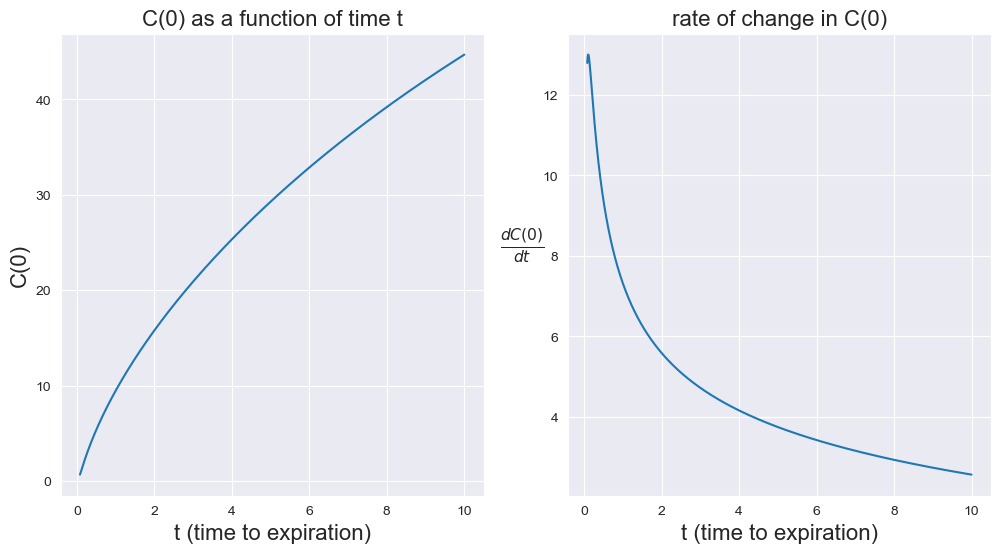

In [73]:
S0 = 100
K = 110
sigma = .3
r = 0.035
times = np.linspace(1/12, 10, 1000)
call_prices = [bs_call(S0,K,sigma, t = times[i], r = r) for i in range(len(times))]
call_prices_dt = [d_bs_call_dt(S0,K,sigma, t = times[i], r = r) for i in range(len(times))]


fig, axes = plt.subplots(1,2 , figsize = (12,6))

axes[0].plot(times, call_prices)
axes[0].set_title('C(0) as a function of time t', fontsize = 16)
axes[0].set_ylabel('C(0)', fontsize = 16)
axes[0].set_xlabel('t (time to expiration)', fontsize = 16)

axes[1].plot(times, call_prices_dt)
axes[1].set_title('rate of change in C(0)', fontsize = 16)
axes[1].set_ylabel('$\\frac{dC(0)}{dt}$', fontsize = 16, 
                   rotation = 0, labelpad = 15)
axes[1].set_xlabel('t (time to expiration)', fontsize = 16)


Text(0.5, 0, 'S(0)')

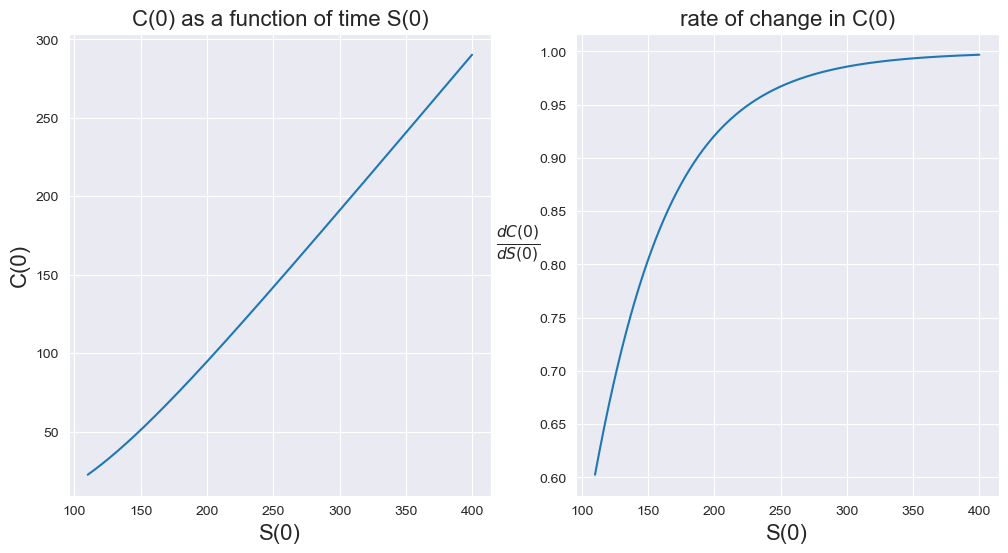

In [74]:
t = 3
K = 110
r = 0.0
sigma = .3
spot_prices = np.linspace(110, 400, 1000)
call_prices = [bs_call(S0,K,sigma, t) for S0 in spot_prices]
call_prices_dS= [d_bs_call_dS(S0,K,sigma, t = t, r = r) for S0 in spot_prices]


fig, axes = plt.subplots(1,2 , figsize = (12,6))

axes[0].plot(spot_prices, call_prices)
axes[0].set_title('C(0) as a function of time S(0)', fontsize = 16)
axes[0].set_ylabel('C(0)', fontsize = 16)
axes[0].set_xlabel('S(0)', fontsize = 16)

axes[1].plot(spot_prices, call_prices_dS)
axes[1].set_title('rate of change in C(0)', fontsize = 16)
axes[1].set_ylabel('$\\frac{dC(0)}{dS(0)}$', fontsize = 16, 
                   rotation = 0, labelpad = 15)
axes[1].set_xlabel('S(0)', fontsize = 16)

Text(0.5, 0, 't (time to expiration)')

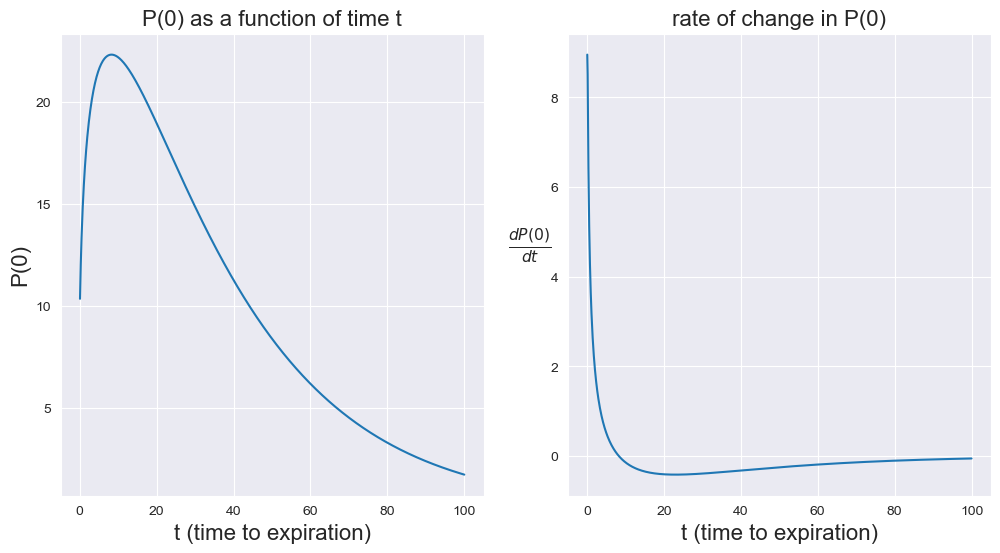

In [76]:
S0 = 100
K = 110
sigma = .3
r = 0.035
times = np.linspace(1/12, 100, 1000)
put_prices = [bs_put(S0,K,sigma, t = times[i], r = r) for i in range(len(times))]
# call_prices = np.array([bs_call(S0,K,sigma, t = times[i], r = r) for i in range(len(times))])
# put_prices = call_prices - S0 + K*np.exp(-r*times)
put_prices_dt = [d_bs_put_dt(S0,K,sigma, t = times[i], r = r) for i in range(len(times))]


fig, axes = plt.subplots(1,2 , figsize = (12,6))

axes[0].plot(times, put_prices)
axes[0].set_title('P(0) as a function of time t', fontsize = 16)
axes[0].set_ylabel('P(0)', fontsize = 16)
axes[0].set_xlabel('t (time to expiration)', fontsize = 16)

axes[1].plot(times, put_prices_dt)
axes[1].set_title('rate of change in P(0)', fontsize = 16)
axes[1].set_ylabel('$\\frac{dP(0)}{dt}$', fontsize = 16, 
                   rotation = 0, labelpad = 15)
axes[1].set_xlabel('t (time to expiration)', fontsize = 16)


Text(0.5, 0, 'S(0)')

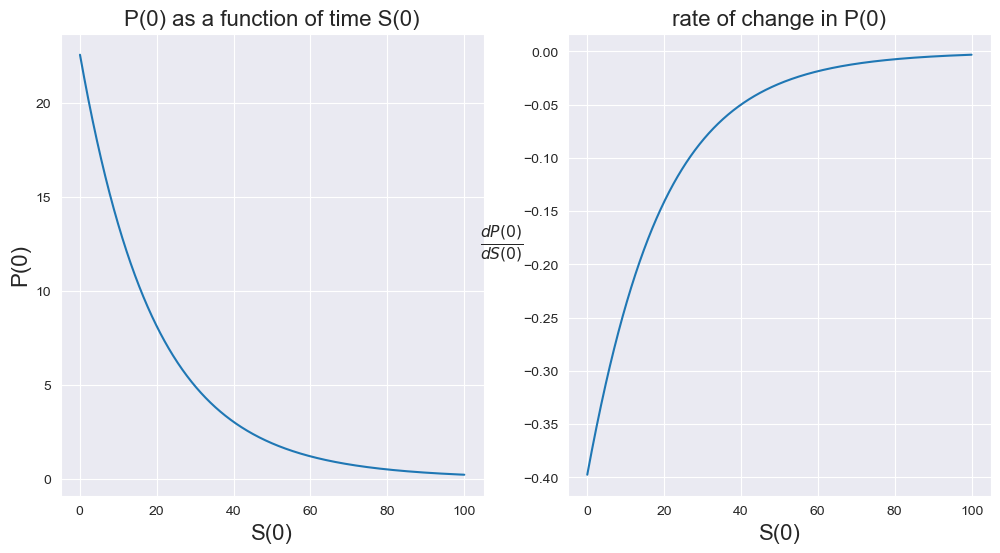

In [77]:
t = 3
K = 110
r = 0.0
sigma = .3
spot_prices = np.linspace(110, 400, 1000)
put_prices = [bs_put(S0,K,sigma, t) for S0 in spot_prices]
put_prices_dS= [d_bs_put_dS(S0,K,sigma, t = t, r = r) for S0 in spot_prices]


fig, axes = plt.subplots(1,2 , figsize = (12,6))

axes[0].plot(times, put_prices)
axes[0].set_title('P(0) as a function of time S(0)', fontsize = 16)
axes[0].set_ylabel('P(0)', fontsize = 16)
axes[0].set_xlabel('S(0)', fontsize = 16)

axes[1].plot(times, put_prices_dS)
axes[1].set_title('rate of change in P(0)', fontsize = 16)
axes[1].set_ylabel('$\\frac{dP(0)}{dS(0)}$', fontsize = 16, 
                   rotation = 0, labelpad = 15)
axes[1].set_xlabel('S(0)', fontsize = 16)
